# HW02 — Работа с табличными данными, контроль качества и базовый EDA

Этот ноутбук выполнен в рамках семинара S02 и включает:
- загрузку и первичный анализ набора данных,
- проверку качества данных,
- исследовательский анализ (EDA),
- визуализацию данных,
- сохранение графика в файл.





## План работы

1. Загрузка данных и первичный осмотр  
2. Пропуски, дубликаты и контроль качества данных  
3. Базовый EDA: частоты, группировки  
4. Визуализация: histogram, boxplot, scatter  
5. Сохранение графика в файл  
6. Итоговый вывод  


## 1. Загрузка данных и первичный осмотр


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Загрузка датасета 
df = pd.read_csv("S02-hw-dataset.csv")

df.head()

# Структура и типы столбцов
df.info()

# Базовые статистики по числовым столбцам
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


## 2. Пропуски, дубликаты и контроль качества данных


In [41]:
## 2. Пропуски, дубликаты и контроль качества данных

# Пропуски по столбцам
df.isna().sum()

# Количество дубликатов
print("Число полностью дублирующих строк:", df.duplicated().sum())

# Примеры дубликатов
df[df.duplicated()].head()

# Подозрительные значения: отрицательные числа

num_cols = df.select_dtypes(include="number").columns
neg_mask = (df[num_cols] < 0).any(axis=1)

df[neg_mask].head()

df[df["age"] > 100]

Число полностью дублирующих строк: 1


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


Возраст 120 лет выглядит нереалистичным и является выбросом / ошибкой ввода.

### Выводы по качеству данных

Анализ качества данных выявил следующие проблемы:

- **Пропуски**: обнаружены в столбце `age` (2 пропуска).  
- **Дубликаты**: найдено 1 полностью дублирующееся наблюдение.  
- **Подозрительные значения**:
  - В столбце `purchases` встречается отрицательное значение (`-1`), что является логической ошибкой.
  - Значение `age = 120` выглядит нереалистичным и является выбросом или ошибкой ввода.
- Эти ошибки могут искажать результаты анализа и требуют корректировки (удаления или исправления).

Таким образом, датасет содержит небольшое количество ошибок, которые важно учитывать перед построением визуализаций и статистических выводов.


## 3. Базовый EDA: частоты, группировки и агрегаты


In [49]:
# Категориальные столбцы
cat_cols = df.select_dtypes(include=["object", "category"]).columns
cat_cols


Index(['country'], dtype='object')

In [51]:
# Частоты по первой категориальной колонке (у нас это country)
df[cat_cols[0]].value_counts()



country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [52]:
df.groupby("country").agg(
    mean_purchases=("purchases", "mean"),
    sum_revenue=("revenue", "sum")
)


,mean_purchases,sum_revenue
country,,
CN,4.500000,2108
DE,6.500000,8673
FR,4.250000,8111
RU,4.769231,10271
US,4.625000,4459


### Выводы по EDA

- Распределение по странам показывает неоднородность активности.
- Среднее количество покупок и доход варьируются в зависимости от страны.
- Видны различия в пользовательском поведении между категориями.


## 4. Визуализация данных (histogram, boxplot, scatter)

В этом разделе строятся три вида графиков на основе числовых признаков:
- гистограмма,
- boxplot,
- scatter plot.


# Гистограмма возраста 

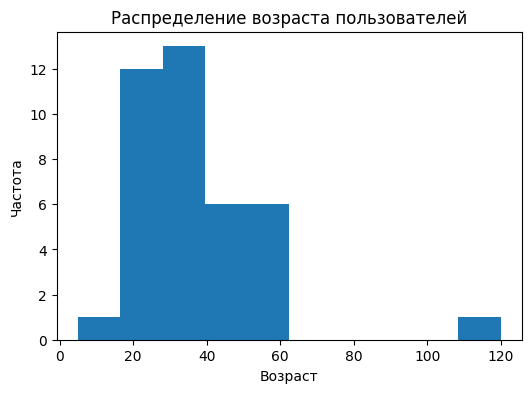

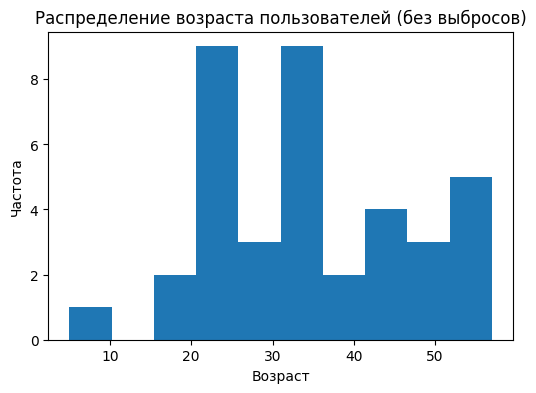

In [40]:
# Гистограмма возраста 
plt.figure(figsize=(6,4))
plt.hist(df["age"].dropna(), bins=10)
plt.title("Распределение возраста пользователей")
plt.xlabel("Возраст")
plt.ylabel("Частота")
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df[df["age"] < 100]["age"].dropna(), bins=10)
plt.title("Распределение возраста пользователей (без выбросов)")
plt.xlabel("Возраст")
plt.ylabel("Частота")
plt.show()



### Вывод по гистограммам возраста

- Первоначальная гистограмма показывает основную концентрацию пользователей в диапазоне **20–50 лет**.
- Однако присутствует аномальное значение **120 лет**, которое выглядит нереалистичным.  
  Оно смещает масштаб и делает распределение визуально сжатым.
- Повторная гистограмма, построенная без выбросов, показывает более естественное распределение:
  пик приходится примерно на **30–40 лет**, после чего частота постепенно уменьшается.
- Таким образом, возраст 120 лет можно считать **выбросом или ошибкой ввода**, и его следует учитывать при дальнейшей обработке данных.


# boxplot покупок

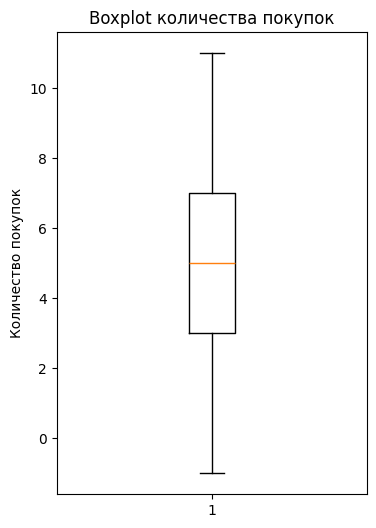

In [38]:
# boxplot покупок
plt.figure(figsize=(4,6))
plt.boxplot(df["purchases"], vert=True)
plt.title("Boxplot количества покупок")
plt.ylabel("Количество покупок")
plt.show()


### Вывод по boxplot количества покупок

- Медианное количество покупок составляет примерно **5**.
- Основная часть пользователей совершает от **3 до 7** покупок.
- Минимальное значение **−1** является аномальным, так как количество покупок не может быть отрицательным.
- Также видны редкие значения выше 10 покупок — это естественные редкие случаи, но не ошибки.
- Boxplot подтверждает наличие выброса в данных (`purchases = -1`), что согласуется с выводами из анализа качества данных.


# Scatter: purchases and revenue 

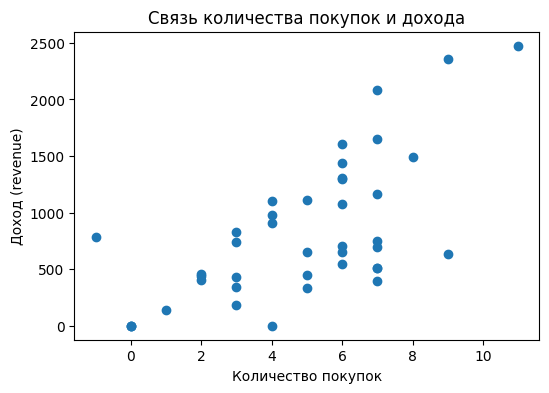

In [39]:
#Scatter: purchases and revenue 
plt.figure(figsize=(6,4))
plt.scatter(df["purchases"], df["revenue"])
plt.title("Связь количества покупок и дохода")
plt.xlabel("Количество покупок")
plt.ylabel("Доход (revenue)")
plt.show()


### Вывод по scatter-графику (purchases vs revenue)

- На графике наблюдается отчётливая **положительная зависимость** между количеством покупок и доходом: 
  чем больше покупок совершает пользователь, тем выше его итоговый доход.
- Точки распределены не строго по линии, но общий тренд выражен достаточно чётко.
- Имеются несколько редких значений с очень высоким доходом (выше 2000), что может указывать на 
  крупных покупателей или отдельные события.
- Также видно одно некорректное значение `purchases = -1`, которое подтверждает наличие ошибки в данных 
  (см. раздел “Контроль качества данных”).
- В целом scatter-график демонстрирует логичную бизнес-зависимость и помогает лучше понять 
  вклад активности пользователя в доход.


## 5. Сохранение графика


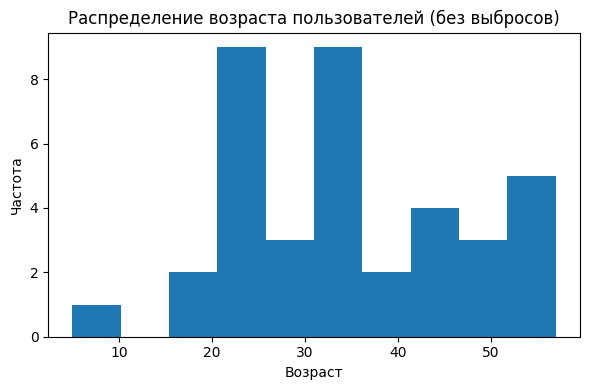

In [43]:
plt.figure(figsize=(6,4))
plt.hist(df[df["age"] < 100]["age"].dropna(), bins=10)
plt.title("Распределение возраста пользователей (без выбросов)")
plt.xlabel("Возраст")
plt.ylabel("Частота")
plt.tight_layout()

plt.savefig("figures/hist_age_no_outliers.png")
plt.show()


## Итоговый вывод

В работе выполнен полный цикл первичного анализа данных:
- загружены и изучены данные,
- проверено качество (пропуски, дубликаты, выбросы),
- выполнены частоты и группировки,
- построены 3 вида визуализаций,
- сохранён график в файл.

Данные содержат выбросы (`age=120`, `purchases=-1`), что важно учитывать при дальнейшем анализе.

Домашнее задание HW02 выполнено в полном объёме.
